<a href="https://colab.research.google.com/github/kusawokoshitemori/MachineLearningPractice/blob/main/MachineLearningPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

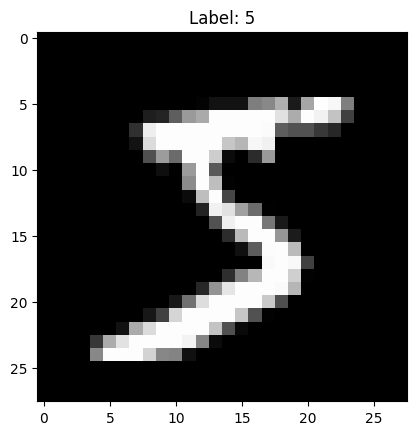

In [36]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# MNISTデータを取得
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# 訓練データを10000枚に制限
train_images = train_images[:10000]
train_labels = train_labels[:10000]

# 画像を表示
plt.imshow(train_images[0], cmap="gray")
plt.title(f"Label: {train_labels[0]}")
plt.show()


In [37]:
# 画像データを0〜1に正規化 MLP使う場合
# train_images = train_images / 255.0
# test_images = test_images / 255.0

# 画像データを0〜1に正規化 CNN使用する場合(白黒画像だから1)
train_images = train_images.reshape(-1, 28, 28, 1).astype("float32") / 255.0
test_images = test_images.reshape(-1, 28, 28, 1).astype("float32") / 255.0


Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 70ms/step - accuracy: 0.8457 - loss: 0.8792 - val_accuracy: 0.4376 - val_loss: 2.3630
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 59ms/step - accuracy: 0.9753 - loss: 0.4071 - val_accuracy: 0.9621 - val_loss: 0.4032
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 62ms/step - accuracy: 0.9777 - loss: 0.3369 - val_accuracy: 0.9652 - val_loss: 0.3348
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 63ms/step - accuracy: 0.9849 - loss: 0.2721 - val_accuracy: 0.9767 - val_loss: 0.2716
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 66ms/step - accuracy: 0.9862 - loss: 0.2307 - val_accuracy: 0.9797 - val_loss: 0.2399
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 58ms/step - accuracy: 0.9859 - loss: 0.2128 - val_accuracy: 0.9709 - val_loss: 0.2533
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 62ms/step - accuracy: 0.9872 - loss: 0.1903 - val_accuracy: 0.9738 - val_loss: 0.2395
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - accuracy: 0.9870 - loss: 0.1834 - 

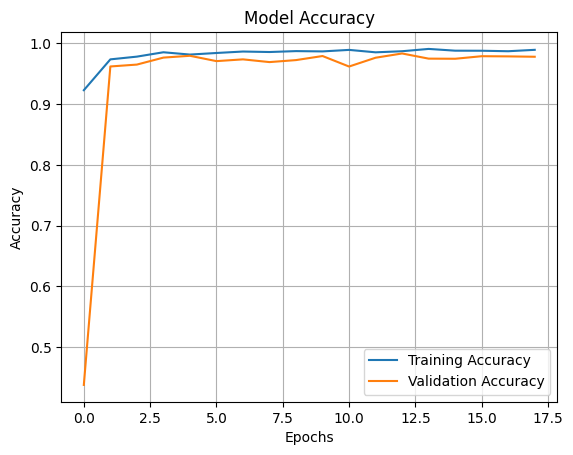

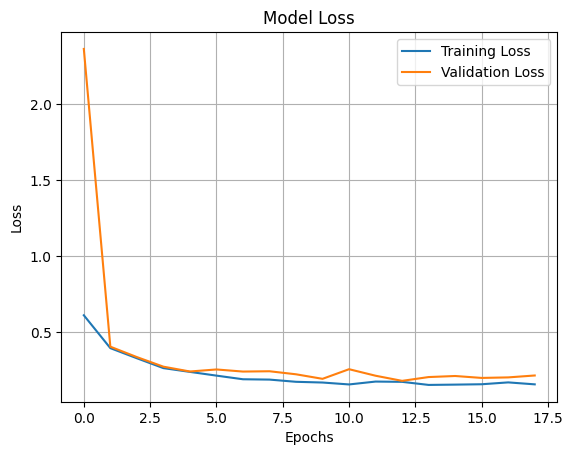

In [38]:
from tensorflow.keras import models, layers, regularizers
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization

# L2正規化を追加

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1),
                  kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu',
                  kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu',
                  kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    layers.Flatten(),

    layers.Dense(128, activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(10, activation='softmax')
])

# CNN モデル 0.9856 データが多いと0.9924
# model = models.Sequential([
#     layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # 畳み込み層1（フィルタ32, 3x3）
#     layers.MaxPooling2D((2, 2)),  # プーリング層1（2x2）

#     layers.Conv2D(64, (3, 3), activation='relu'),  # 畳み込み層2（フィルタ64, 3x3）
#     layers.MaxPooling2D((2, 2)),  # プーリング層2（2x2）

#     layers.Conv2D(128, (3, 3), activation='relu'),  # 畳み込み層3（フィルタ128, 3x3）
#     layers.Flatten(),  # 1次元化

#     layers.Dense(128, activation='relu'),  # 全結合層
#     layers.Dropout(0.5),  # 過学習防止のためのドロップアウト
#     layers.Dense(10, activation='softmax')  # 出力層（10 クラス分類）
# ])

# 複雑なMLPモデル 0.9824(画像全て)
# model = models.Sequential([
#     layers.Flatten(input_shape=(28, 28)),
#     layers.Dense(512, activation='relu'),
#     layers.Dropout(0.2),
#     layers.Dense(256, activation='relu'),
#     layers.Dropout(0.2),
#     layers.Dense(128, activation='relu'),
#     layers.Dropout(0.2),
#     layers.Dense(10, activation='softmax')
# ])

# 単純なMLPモデル 0.9781(画像全て)
# model = models.Sequential([
#     layers.Flatten(input_shape=(28, 28)),  # 28x28 の画像を 1 次元に変換
#     layers.Dense(128, activation='relu'),  # 隠れ層1
#     layers.Dense(10, activation='softmax') # 出力層（10 クラス分類）
# ])

# アーリーストッピングの設定
early_stopping = EarlyStopping(
    monitor='val_loss',   # 監視対象（'val_loss' or 'val_accuracy'）
    patience=5,           # 5エポック改善しなかったらストップ
    restore_best_weights=True  # 最も良い重みを復元
)

# モデルのコンパイル
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# モデルの学習
hist = model.fit(train_images, train_labels,
                 epochs=50,
                 validation_data=(test_images, test_labels),
                 callbacks=[early_stopping])

# === 学習の可視化 ===
# 正解率の推移をプロット
plt.plot(hist.history['accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# 損失の推移をプロット
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


In [39]:
# import numpy as np

# # 学習後、最初の1つのデータに対して予測
# predictions = model(train_images[:3]).numpy()

# # ソフトマックスで確率に変換
# probabilities = tf.nn.softmax(predictions)

# # 確率をNumPy配列に変換
# probabilities_np = probabilities.numpy()

# # NumPyでの表示設定を変更
# np.set_printoptions(precision=3, suppress=True)

# # 確率を表示
# print(probabilities_np)

# print(train_labels[:3])

In [40]:
# import numpy as np

# # 学習後、最初の1つのデータに対して予測
# predictions = model(test_images[:3]).numpy()

# # ソフトマックスで確率に変換
# probabilities = tf.nn.softmax(predictions)

# # 確率をNumPy配列に変換
# probabilities_np = probabilities.numpy()

# # NumPyでの表示設定を変更
# np.set_printoptions(precision=3, suppress=True)

# # 確率を表示
# print(probabilities_np)

# print(test_labels[:3])

In [43]:
# 訓練データ
train_loss, train_acc = model.evaluate(train_images, train_labels)
print("Train accuracy:", train_acc)



313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9966 - loss: 0.1424
Train accuracy: 0.9962999820709229


In [44]:
# テストデータ
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9814 - loss: 0.1870
Test accuracy: 0.9835000038146973
